# Graph changepoint detection

Set up:

```
python3 -m venv .venv
source .venv/bin/activate
pip install -r requirements.txt
```

## Generate points where the pairwise distances fit a given distribution

In [28]:
import math
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [2]:
N = 10
max_rows = 10
max_cols = 10

# Define the grid
grid = np.zeros((max_rows, max_cols))

# Randomly place N points in the grid
for i in range(N):
    placed = False
    while not placed:
        row = np.random.randint(max_rows)
        col = np.random.randint(max_cols)
        if grid[row, col] == 0:
            grid[row, col] = 1
            placed = True            

In [15]:
def distance(p1, p2):
    """Euclidean distance between points p1 and p2."""

    return math.sqrt(math.pow(p2[0] - p1[0], 2) + math.pow(p2[1] - p1[1], 2))

In [20]:
def calculate_pairwise_distances(grid, index):
    """Returns an array of the pairwise distances of elements in the grid."""

    n_rows, n_cols = grid.shape
    
    # Find the positions of the points with the required index
    positions = []
    for row in range(n_rows):
        for col in range(n_cols):
            if grid[row, col] == index:
                positions.append((row, col))
    
    # Calculate the pairwise distances 
    distances = []
    for start in range(0, len(positions)-1):
        for end in range(start+1, len(positions)):
            distances.append(distance(positions[start], positions[end]))

    return np.array(distances)

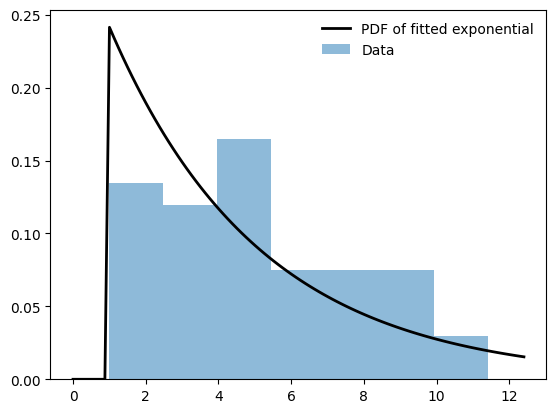

In [44]:
d = calculate_pairwise_distances(grid, 1)

# Fit an exponential distribution
loc, scale = stats.expon.fit(d)

fig, ax = plt.subplots(1, 1)

x = np.linspace(0, max(d)+1, 100)
rv = stats.expon(loc, scale)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='PDF of fitted exponential')

ax.hist(d, density=True, bins='auto', histtype='stepfilled', alpha=0.5, label='Data')
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
def randomly_move_point(grid, point):
    n_rows, n_cols = grid.shape
    
    # Clone the grid
    cloned_grid = grid[:]

    index = grid[point[0], point[1]]

    


In [ ]:
for i in range(100):
    

stats.kstest(d, stats.expon(loc, scale).cdf).pvalue

np.float64(0.10145575362285142)

In [50]:
grid[:]

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])